In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet



In [5]:
# Read data from Resources\cleaned_crime_data.csv
file_path = "Resources/cleaned_crime_data.csv"
crime_data = pd.read_csv(file_path)
crime_data.head()

,ds,ofns_desc
0,2010-01-01 00:00:00,RAPE
1,2010-01-01 00:00:00,SEX CRIMES
2,2010-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &
3,2010-01-01 00:00:00,SEX CRIMES
4,2010-01-01 00:00:00,CRIMINAL MISCHIEF & RELATED OF


In [11]:
# group by ofns_desc and count the number of crimes for each ofns_desc over the entire time period
crime_data_grouped = crime_data.groupby('ofns_desc').size().reset_index(name='counts')
crime_data_grouped = crime_data_grouped.sort_values(by='counts', ascending=False)
crime_data_grouped = crime_data_grouped.head(10)
crime_data_grouped

,ofns_desc,counts
41,PETIT LARCENY,1120973
24,HARRASSMENT 2,848787
6,ASSAULT 3 & RELATED OFFENSES,673483
11,CRIMINAL MISCHIEF & RELATED OF,616129
22,GRAND LARCENY,555028
13,DANGEROUS DRUGS,291714
32,OFF. AGNST PUB ORD SENSBLTY &,288325
17,FELONY ASSAULT,268562
46,ROBBERY,212569
8,BURGLARY,198312


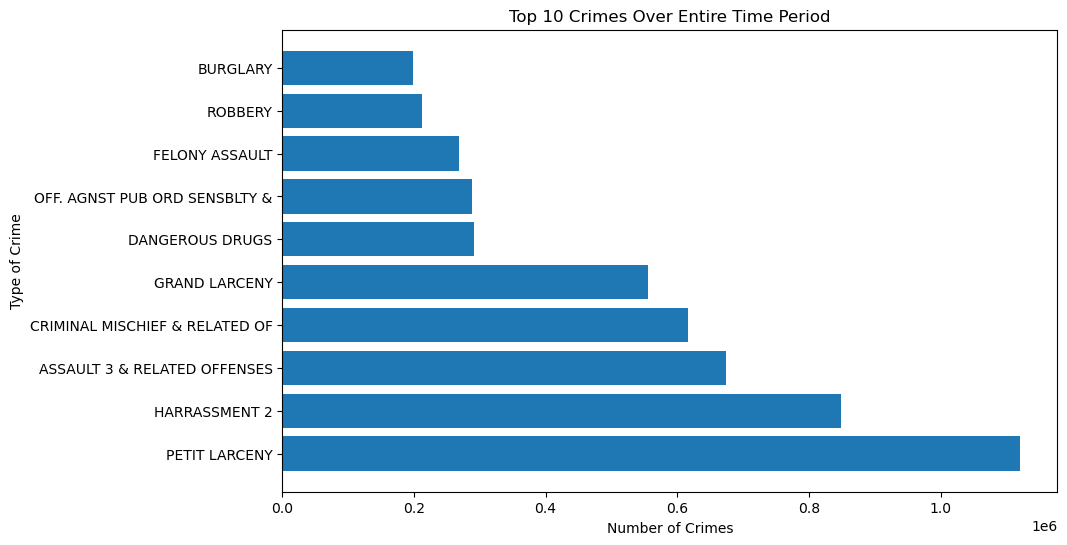

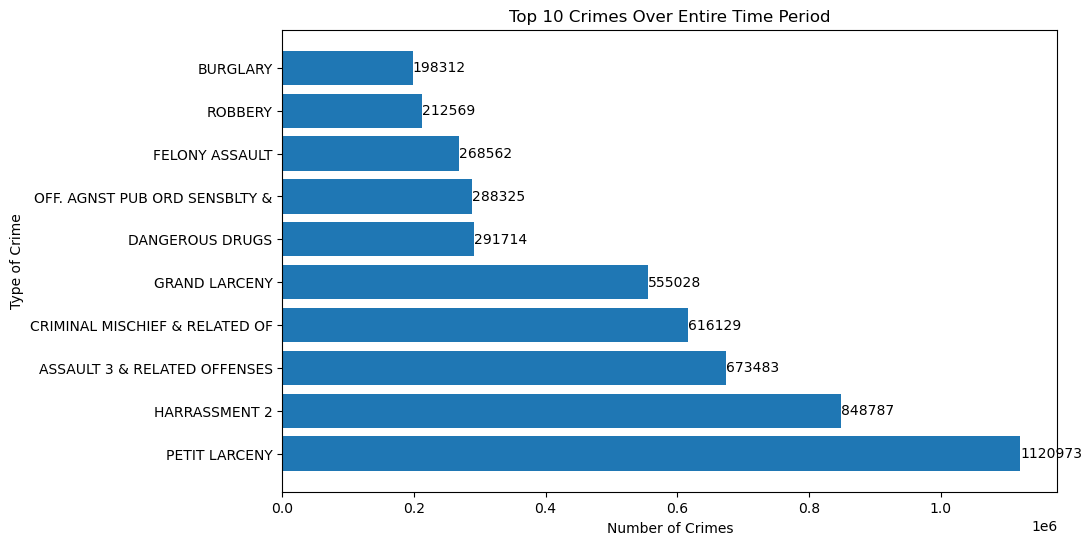

In [13]:
# Plot the top 20 crimes over entire time period
plt.figure(figsize=(10, 6))
plt.barh(crime_data_grouped['ofns_desc'], crime_data_grouped['counts'])
plt.xlabel('Number of Crimes')
plt.ylabel('Type of Crime')
plt.title('Top 10 Crimes Over Entire Time Period')
plt.show()

# Plot the top 20 crimes over entire time period
plt.figure(figsize=(10, 6))
plt.barh(crime_data_grouped['ofns_desc'], crime_data_grouped['counts'])
plt.xlabel('Number of Crimes')
plt.ylabel('Type of Crime')
plt.title('Top 10 Crimes Over Entire Time Period')

# Add total numbers for each crime
for i, count in enumerate(crime_data_grouped['counts']):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()


In [18]:
# Prepare data for Prophet
# Take each of first 10 crimes and create a dataframe with date and count of each crime per day

first_10_crimes = crime_data_grouped['ofns_desc'].head(10).tolist()

# Create a new dataframe for each crime with date and count of each crime per day
crime_data_per_day = pd.DataFrame()

for crime in first_10_crimes:
    # Filter the crime data for the current crime
    crime_data_filtered = crime_data[crime_data['ofns_desc'] == crime]
    
    # Group the filtered data by date and count the number of crimes per day
    crime_data_per_day_crime = crime_data_filtered.groupby('ds').size().reset_index(name='count')
    
    # Rename the columns to 'ds' and 'y'
    crime_data_per_day_crime = crime_data_per_day_crime.rename(columns={'ds': 'ds', 'count': 'y'})
    
    # Append the crime data per day for the current crime to the main dataframe
    crime_data_per_day = pd.concat([crime_data_per_day, crime_data_per_day_crime], ignore_index=True)

crime_data_per_day.head()


,ds,y
0,2010-01-01 00:00:00,3
1,2010-01-01 00:01:00,5
2,2010-01-01 00:05:00,1
3,2010-01-01 00:30:00,2
4,2010-01-01 00:46:00,1


In [19]:
# Take each of first 10 crimes and create a dataframe with date and count of each crime per day

first_10_crimes = crime_data_grouped['ofns_desc'].head(10).tolist()

# Take each of first 10 crimes and create set ofa dataframes with date and count of each crime per day. Name the dataframes as per the crime name
crime_data_per_day = {}
for crime in first_10_crimes:
    # Filter the crime data for the current crime
    crime_data_filtered = crime_data[crime_data['ofns_desc'] == crime]
    
    # Group the filtered data by date and count the number of crimes per day
    crime_data_per_day[crime] = crime_data_filtered.groupby('ds').size().reset_index(name='count')
    
    # Rename the columns to 'ds' and 'y'
    crime_data_per_day[crime] = crime_data_per_day[crime].rename(columns={'ds': 'ds', 'count': 'y'})

crime_data_per_day['PETIT LARCENY'].head()



,ds,y
0,2010-01-01 00:00:00,3
1,2010-01-01 00:01:00,5
2,2010-01-01 00:05:00,1
3,2010-01-01 00:30:00,2
4,2010-01-01 00:46:00,1


In [21]:
# HARRASSMENT 2
crime_data_per_day['HARRASSMENT 2'].head()

,ds,y
0,2010-01-01 00:01:00,6
1,2010-01-01 00:05:00,2
2,2010-01-01 00:15:00,1
3,2010-01-01 00:30:00,4
4,2010-01-01 00:45:00,1


In [26]:
# Create dataframe for PETIT LARCENY
# Rename the columns to 'ds' and 'y'
# Make ds as index

crime_data_per_day['PETIT LARCENY'] = crime_data_per_day['PETIT LARCENY'].rename(columns={'ds': 'ds', 'count': 'y'})
crime_data_per_day['PETIT LARCENY'] = crime_data_per_day['PETIT LARCENY'].set_index('ds')
crime_data_per_day['PETIT LARCENY'].head()


,y
ds,
2010-01-01 00:00:00,3
2010-01-01 00:01:00,5
2010-01-01 00:05:00,1
2010-01-01 00:30:00,2
2010-01-01 00:46:00,1


In [ ]:
# Run prophet model for PETIT LARCENY
# Create a new dataframe with the date range for the entire time period
# Reset the index of the dataframe
# Run the prophet model for the dataframe
# Make future dataframe for the next 90 days
# Predict the future dataframe
# Plot the forecast
